In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
path1='Data'
path2='sales_train_validation.csv'
print(os.getcwd())

H:\My Drive\M5forecastcomp\m5vtmechcrew


In [3]:
import sys

data = pd.read_csv(os.path.join(path1,path2), delimiter=",") # read comma separated data
# m = data.shape[0]                                     # number of training example

# y = np.array(ts1)
# y.shape


In [4]:
print(data.columns)
print(data)

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1919)
                                  id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS

In [5]:
# aggregating at level 1 (store)
store_level = data.groupby(data['store_id']).sum()
print(store_level)

           d_1   d_2   d_3   d_4   d_5   d_6   d_7   d_8   d_9  d_10  ...  \
store_id                                                              ...   
CA_1      4337  4155  2816  3051  2630  3276  3450  5437  4340  3157  ...   
CA_2      3494  3046  2121  2324  1942  2288  2629  3729  2957  2218  ...   
CA_3      4739  4827  3785  4232  3817  4369  4703  5456  5581  4912  ...   
CA_4      1625  1777  1386  1440  1536  1389  1469  1988  1818  1535  ...   
TX_1      2556  2687  1822  2258  1694  2734  1691  2820  2887  2174  ...   
TX_2      3852  3937  2731  2954  2492  3439  2588  3772  3657  2932  ...   
TX_3      3030  3006  2225  2169  1726  2833  1947  2848  2832  2213  ...   
WI_1      2704  2194  1562  1251     2  2049  2815  3248  1674  1355  ...   
WI_2      2256  1922  2018  2522  1175  2244  2232  2643  2140  1836  ...   
WI_3      4038  4198  3317  3211  2132  4590  4486  5991  4850  3240  ...   

          d_1904  d_1905  d_1906  d_1907  d_1908  d_1909  d_1910  d_1911  \

In [6]:
#Making transformation so that it can be merged with calendar.csv
store_levelt=store_level.transpose()
print(store_levelt)

store_id  CA_1  CA_2  CA_3  CA_4  TX_1  TX_2  TX_3  WI_1  WI_2  WI_3
d_1       4337  3494  4739  1625  2556  3852  3030  2704  2256  4038
d_2       4155  3046  4827  1777  2687  3937  3006  2194  1922  4198
d_3       2816  2121  3785  1386  1822  2731  2225  1562  2018  3317
d_4       3051  2324  4232  1440  2258  2954  2169  1251  2522  3211
d_5       2630  1942  3817  1536  1694  2492  1726     2  1175  2132
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
d_1909    3722  3691  5235  2500  2901  3384  3315  3242  4194  3159
d_1910    3709  3303  5018  2458  2776  3446  3380  3324  4393  3226
d_1911    4387  4457  5623  2628  3022  3902  3691  3991  4988  3828
d_1912    5577  5884  7419  2954  3700  4483  4083  4772  5404  4686
d_1913    6113  6082  7721  3271  4033  4292  3957  4874  5127  4325

[1913 rows x 10 columns]


In [7]:
store_levelt['d']=store_levelt.index
print(store_levelt)

store_id  CA_1  CA_2  CA_3  CA_4  TX_1  TX_2  TX_3  WI_1  WI_2  WI_3       d
d_1       4337  3494  4739  1625  2556  3852  3030  2704  2256  4038     d_1
d_2       4155  3046  4827  1777  2687  3937  3006  2194  1922  4198     d_2
d_3       2816  2121  3785  1386  1822  2731  2225  1562  2018  3317     d_3
d_4       3051  2324  4232  1440  2258  2954  2169  1251  2522  3211     d_4
d_5       2630  1942  3817  1536  1694  2492  1726     2  1175  2132     d_5
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...     ...
d_1909    3722  3691  5235  2500  2901  3384  3315  3242  4194  3159  d_1909
d_1910    3709  3303  5018  2458  2776  3446  3380  3324  4393  3226  d_1910
d_1911    4387  4457  5623  2628  3022  3902  3691  3991  4988  3828  d_1911
d_1912    5577  5884  7419  2954  3700  4483  4083  4772  5404  4686  d_1912
d_1913    6113  6082  7721  3271  4033  4292  3957  4874  5127  4325  d_1913

[1913 rows x 11 columns]


In [8]:
path3='calendar.csv'
calender=pd.read_csv(os.path.join(path1,path3))
print(calender)

            date  wm_yr_wk    weekday  wday  month  year       d  \
0     2011-01-29     11101   Saturday     1      1  2011     d_1   
1     2011-01-30     11101     Sunday     2      1  2011     d_2   
2     2011-01-31     11101     Monday     3      1  2011     d_3   
3     2011-02-01     11101    Tuesday     4      2  2011     d_4   
4     2011-02-02     11101  Wednesday     5      2  2011     d_5   
...          ...       ...        ...   ...    ...   ...     ...   
1964  2016-06-15     11620  Wednesday     5      6  2016  d_1965   
1965  2016-06-16     11620   Thursday     6      6  2016  d_1966   
1966  2016-06-17     11620     Friday     7      6  2016  d_1967   
1967  2016-06-18     11621   Saturday     1      6  2016  d_1968   
1968  2016-06-19     11621     Sunday     2      6  2016  d_1969   

      event_name_1 event_type_1  event_name_2 event_type_2  snap_CA  snap_TX  \
0              NaN          NaN           NaN          NaN        0        0   
1              NaN     

In [9]:
#Merging of sales and calendar fils
store_level_final = store_levelt.merge(calender, on='d')
print(store_level_final)

      CA_1  CA_2  CA_3  CA_4  TX_1  TX_2  TX_3  WI_1  WI_2  WI_3  ... wday  \
0     4337  3494  4739  1625  2556  3852  3030  2704  2256  4038  ...    1   
1     4155  3046  4827  1777  2687  3937  3006  2194  1922  4198  ...    2   
2     2816  2121  3785  1386  1822  2731  2225  1562  2018  3317  ...    3   
3     3051  2324  4232  1440  2258  2954  2169  1251  2522  3211  ...    4   
4     2630  1942  3817  1536  1694  2492  1726     2  1175  2132  ...    5   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...   
1908  3722  3691  5235  2500  2901  3384  3315  3242  4194  3159  ...    5   
1909  3709  3303  5018  2458  2776  3446  3380  3324  4393  3226  ...    6   
1910  4387  4457  5623  2628  3022  3902  3691  3991  4988  3828  ...    7   
1911  5577  5884  7419  2954  3700  4483  4083  4772  5404  4686  ...    1   
1912  6113  6082  7721  3271  4033  4292  3957  4874  5127  4325  ...    2   

     month  year event_name_1  event_type_1  event_name_2  even

In [10]:
#Observing NAN values
pd.isna(store_level_final).sum()

CA_1               0
CA_2               0
CA_3               0
CA_4               0
TX_1               0
TX_2               0
TX_3               0
WI_1               0
WI_2               0
WI_3               0
d                  0
date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
event_name_1    1759
event_type_1    1759
event_name_2    1909
event_type_2    1909
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [11]:
# Total number of variables at level 1 (numerical as well as explanatory)
print(store_level_final.columns)
# store_level_final.to_csv('level1store.csv')
store_level_final.shape[1]

Index(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2',
       'WI_3', 'd', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')


24

In [12]:
# Trying out shift command 
store_level_final.shift(1)

CA_1    CA_2    CA_3    CA_4    TX_1    TX_2    TX_3    WI_1    WI_2  \
0        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     4337.0  3494.0  4739.0  1625.0  2556.0  3852.0  3030.0  2704.0  2256.0   
2     4155.0  3046.0  4827.0  1777.0  2687.0  3937.0  3006.0  2194.0  1922.0   
3     2816.0  2121.0  3785.0  1386.0  1822.0  2731.0  2225.0  1562.0  2018.0   
4     3051.0  2324.0  4232.0  1440.0  2258.0  2954.0  2169.0  1251.0  2522.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1908  3793.0  3631.0  5683.0  2677.0  3257.0  3727.0  3938.0  3069.0  4464.0   
1909  3722.0  3691.0  5235.0  2500.0  2901.0  3384.0  3315.0  3242.0  4194.0   
1910  3709.0  3303.0  5018.0  2458.0  2776.0  3446.0  3380.0  3324.0  4393.0   
1911  4387.0  4457.0  5623.0  2628.0  3022.0  3902.0  3691.0  3991.0  4988.0   
1912  5577.0  5884.0  7419.0  2954.0  3700.0  4483.0  4083.0  4772.0  5404.0   

        WI_3  ... wday month    year event_name_1  event_type_1  event_name_2  \
0        NaN  ...  NaN   NaN     NaN          NaN           NaN           NaN   
1     4038.0  ...  1.0   1.0  2011.0          NaN           NaN           NaN   
2     4198.0  ...  2.0   1.0  2011.0          NaN           NaN           NaN   
3     3317.0  ...  3.0   1.0  2011.0          NaN           NaN           NaN   
4     3211.0  ...  4.0   2.0  2011.0          NaN           NaN           NaN   
...      ...  ...  ...   ...     ...          ...           ...           ...   
1908  3331.0  ...  4.0   4.0  2016.0          NaN           NaN           NaN   
1909  3159.0  ...  5.0   4.0  2016.0          NaN           NaN           NaN   
1910  3226.0  ...  6.0   4.0  2016.0          NaN           NaN           NaN   
1911  3828.0  ...  7.0   4.0  2016.0          NaN           NaN           NaN   
1912  4686.0  ...  1.0   4.0  2016.0          NaN           NaN           NaN   

      event_type_2 snap_CA snap_TX snap_WI  
0              NaN     NaN     NaN     NaN  
1              NaN     0.0     0.0     0.0  
2              NaN     0.0     0.0     0.0  
3              NaN     0.0     0.0     0.0  
4              NaN     1.0     1.0     0.0  
...            ...     ...     ...     ...  
1908           NaN     0.0     0.0     0.0  
1909           NaN     0.0     0.0     0.0  
1910           NaN     0.0     0.0     0.0  
1911           NaN     0.0     0.0     0.0  
1912           NaN     0.0     0.0     0.0  

[1913 rows x 24 columns]

In [13]:
store_level_final.index.name='Day ID'
store_level_final['date']

Day ID
0       2011-01-29
1       2011-01-30
2       2011-01-31
3       2011-02-01
4       2011-02-02
           ...    
1908    2016-04-20
1909    2016-04-21
1910    2016-04-22
1911    2016-04-23
1912    2016-04-24
Name: date, Length: 1913, dtype: object

In [14]:
# Converting date columns to datetime object 
store_level_final['date'] = pd.to_datetime(store_level_final['date'])
store_level_final['date']

Day ID
0      2011-01-29
1      2011-01-30
2      2011-01-31
3      2011-02-01
4      2011-02-02
          ...    
1908   2016-04-20
1909   2016-04-21
1910   2016-04-22
1911   2016-04-23
1912   2016-04-24
Name: date, Length: 1913, dtype: datetime64[ns]

In [15]:
# Making date columns as index
store_level_final=store_level_final.set_index('date')

In [16]:
# way to observe time series at different frequencies

# store_level_final.index = pd.to_datetime(store_level_final.index, unit='s')
# Referene: https://towardsdatascience.com/working-with-time-series-data-a8872ebcac3
store_level_final.index
print(store_level_final['CA_1'].resample('MS').mean())
print(store_level_final['CA_1'].resample('W').mean())

date
2011-01-01    3769.333333
2011-02-01    3194.071429
2011-03-01    3015.096774
2011-04-01    3051.766667
2011-05-01    2838.322581
                 ...     
2015-12-01    3988.903226
2016-01-01    4245.096774
2016-02-01    4367.413793
2016-03-01    4405.064516
2016-04-01    4701.958333
Freq: MS, Name: CA_1, Length: 64, dtype: float64
date
2011-01-30    4246.000000
2011-02-06    3571.428571
2011-02-13    3362.571429
2011-02-20    3000.285714
2011-02-27    2923.428571
                 ...     
2016-03-27    4495.714286
2016-04-03    4637.714286
2016-04-10    4756.285714
2016-04-17    4364.428571
2016-04-24    4520.857143
Freq: W-SUN, Name: CA_1, Length: 274, dtype: float64


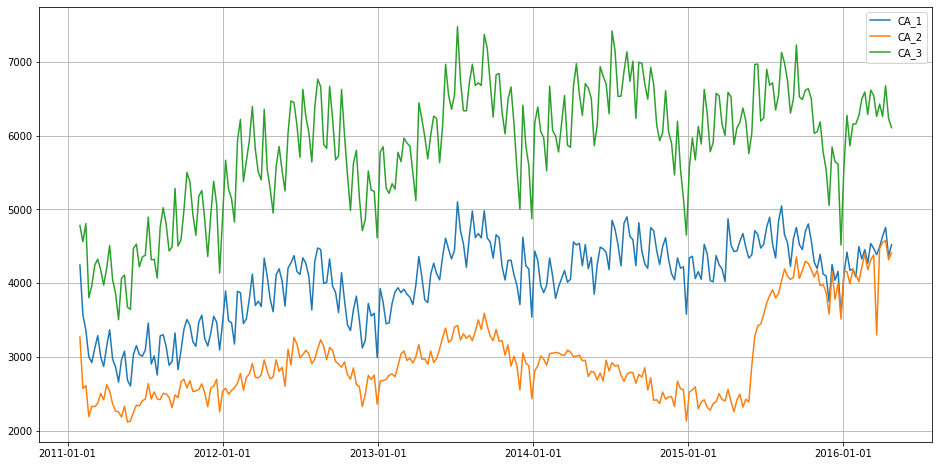

In [17]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.pyplot import figure
%matplotlib inline
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot2grid((1,1), (0,0))
ax1.plot(store_level_final['CA_1'].resample('W').mean(),label='CA_1')
ax1.plot(store_level_final['CA_2'].resample('W').mean(),label='CA_2')
ax1.plot(store_level_final['CA_3'].resample('W').mean(),label='CA_3')
ax1.grid(True)
ax1.legend()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

(10, 1913)


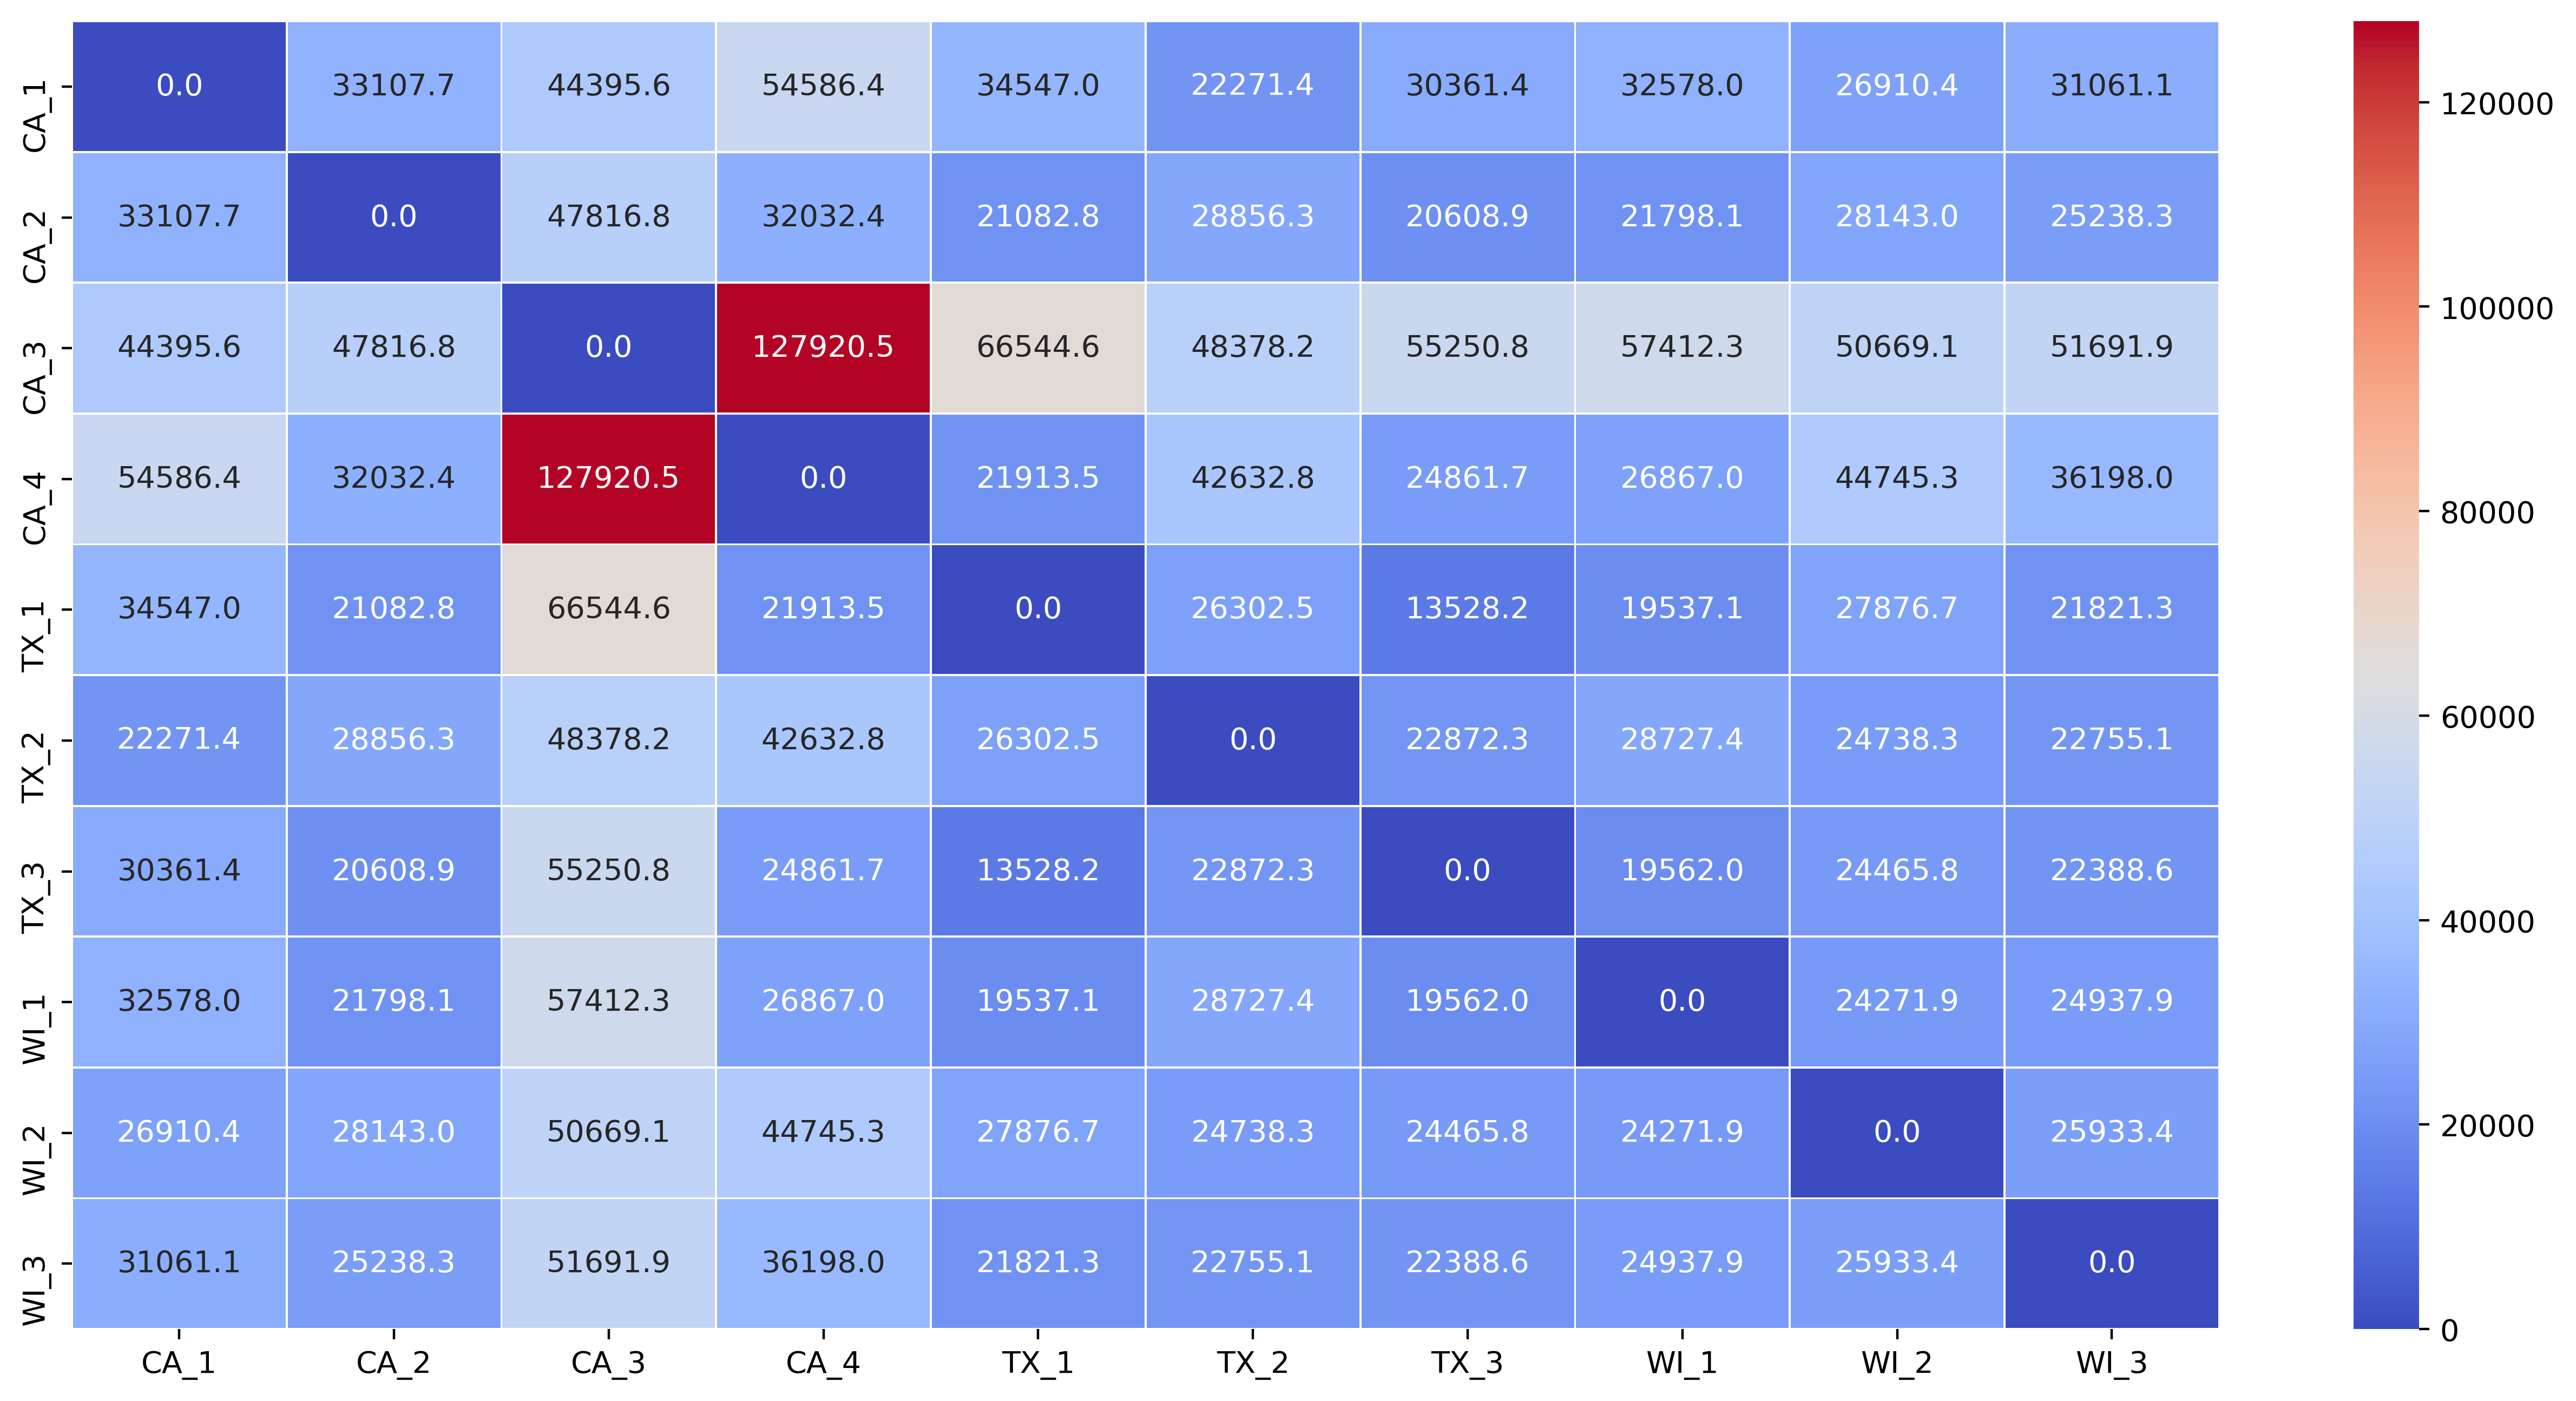

In [18]:
from tslearn.metrics import cdist_dtw
from scipy.spatial.distance import cdist
import seaborn as sns

State=[]
for i in range(10):
    State.append(store_level_final[store_level_final.columns[i]].values)
    
State=np.array(State)
print(State.shape)
correlation=cdist_dtw(State,State)
# print(correlation)
fig,ax=plt.subplots(figsize=(16,8),dpi=400)
ax = sns.heatmap(correlation, linewidth=0.5,cmap='coolwarm',annot=True,fmt=".1f")
ax.set_xticklabels(store_level_final.columns[0:10])
ax.set_yticklabels(store_level_final.columns[0:10])
plt.show()

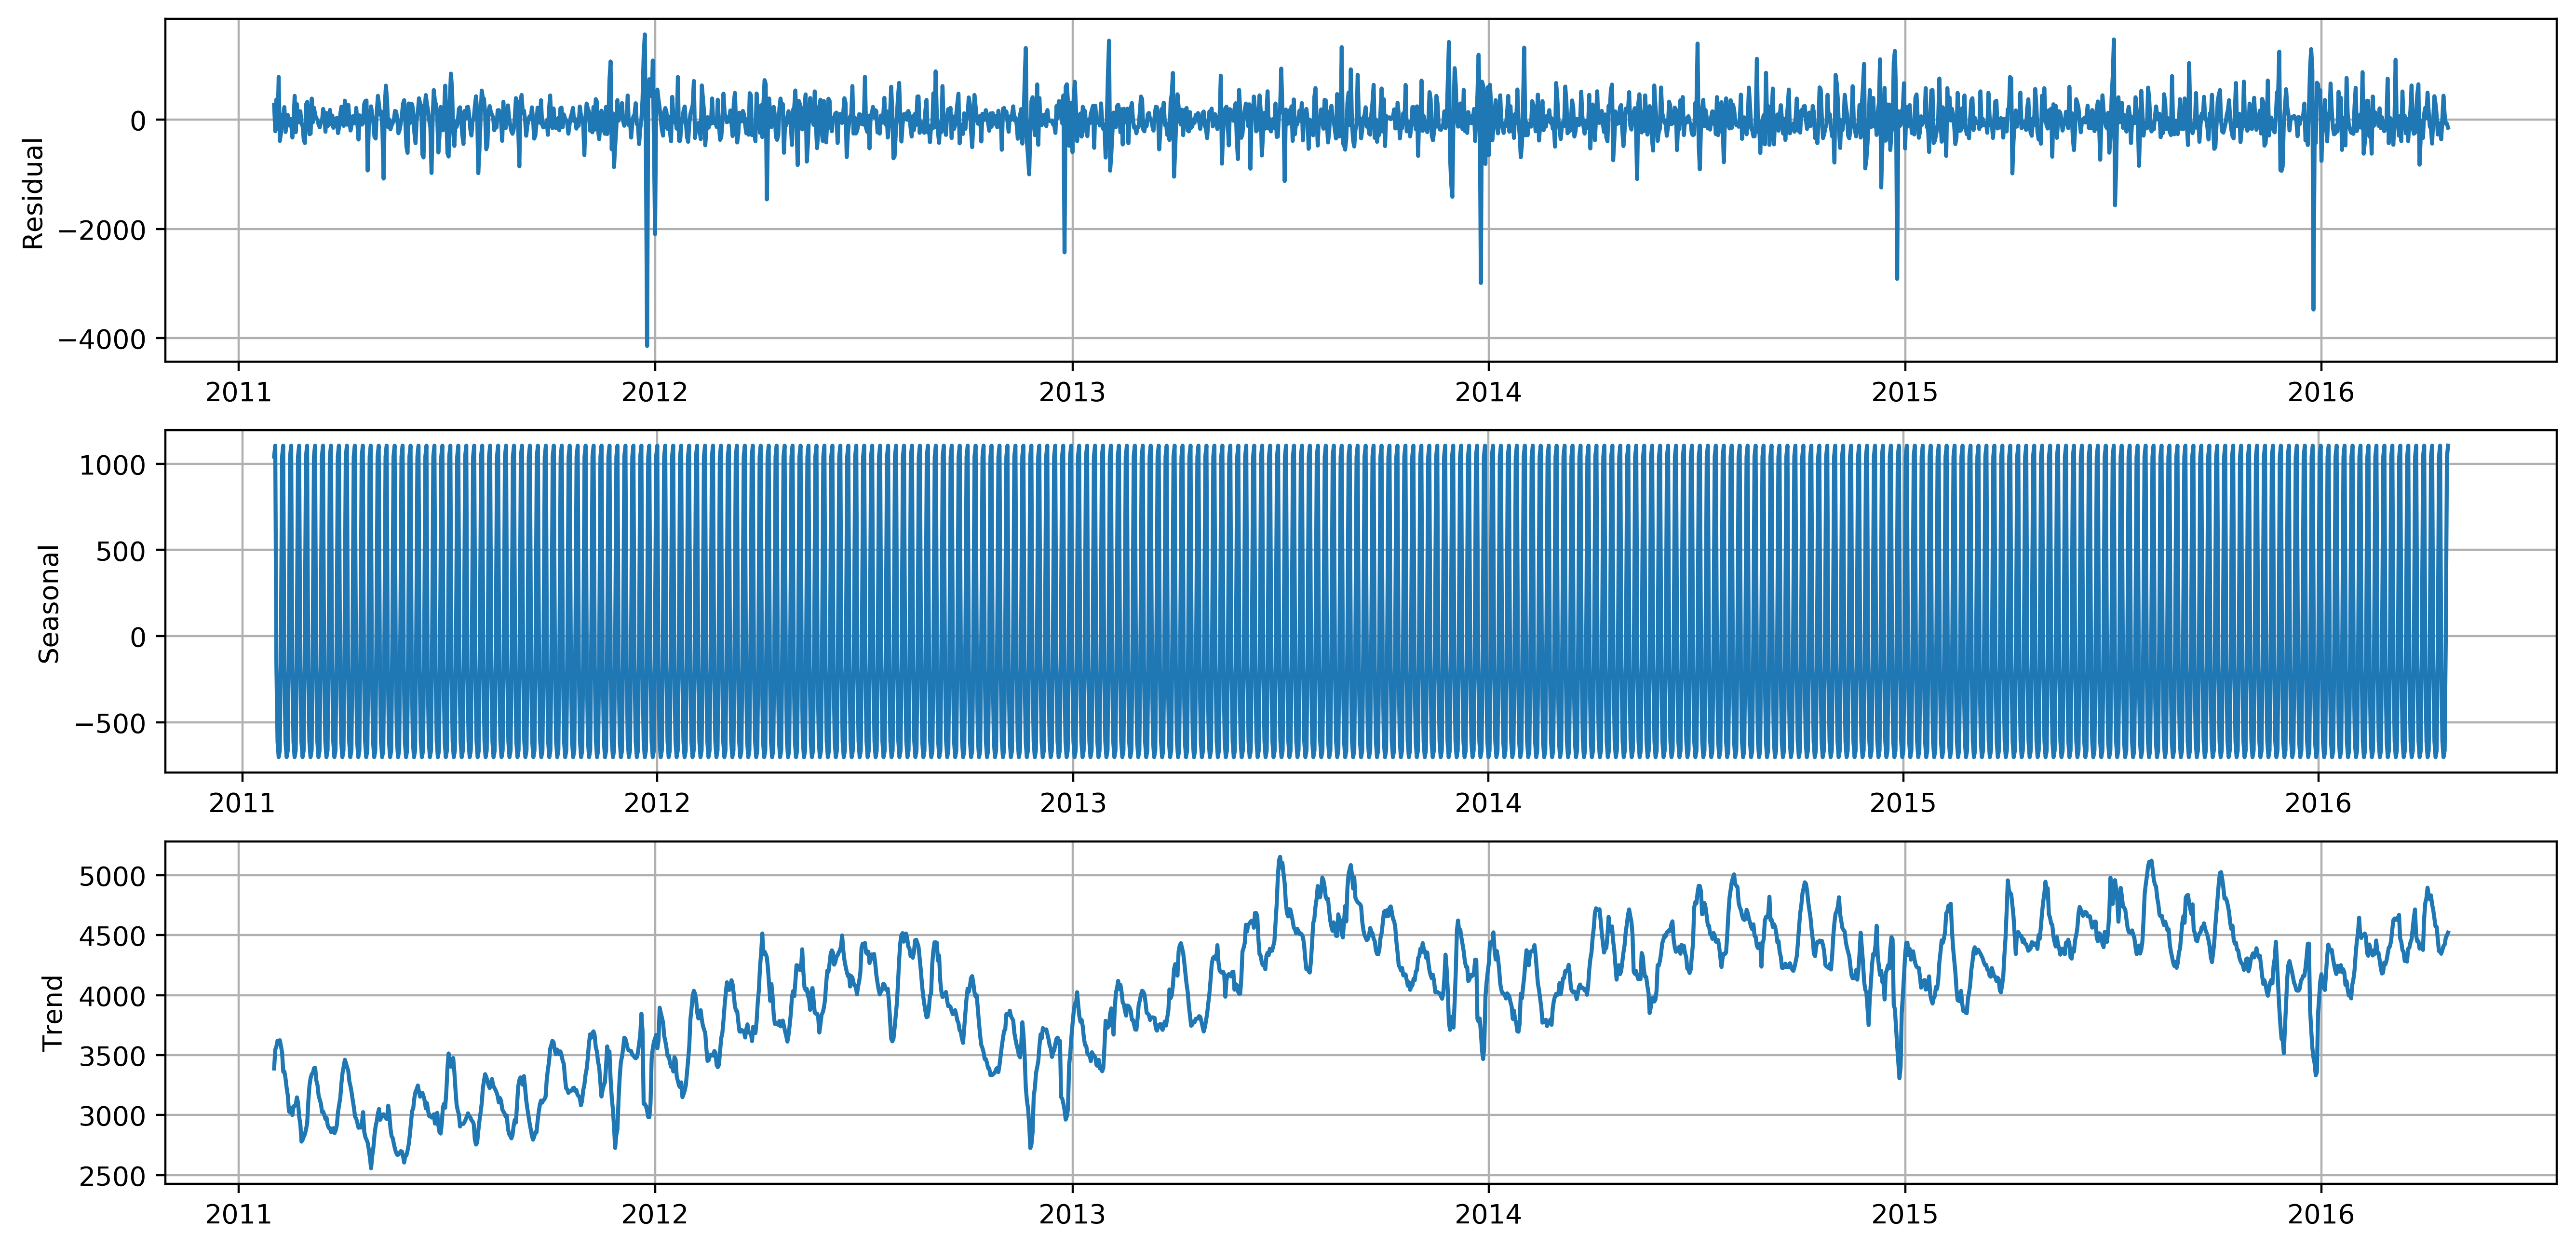

In [19]:
# decomposition referene: https://gist.github.com/balzer82/5cec6ad7adc1b550e7ee

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(store_level_final['CA_1'], model='additive')
fig,axs=plt.subplots(3,1,figsize=(16,8),dpi=400)
# fig=plt.figure(figsize=(16,8),dpi=400)
axs[0].plot(decomposition.resid)
axs[0].set_ylabel('Residual')
axs[0].grid('True')

axs[1].plot(decomposition.seasonal)
axs[1].set_ylabel('Seasonal')
axs[1].grid('True')

axs[2].plot(decomposition.trend)
axs[2].set_ylabel('Trend')
axs[2].grid('True')

plt.show()

C:\Users\Sujal Bhavsar\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


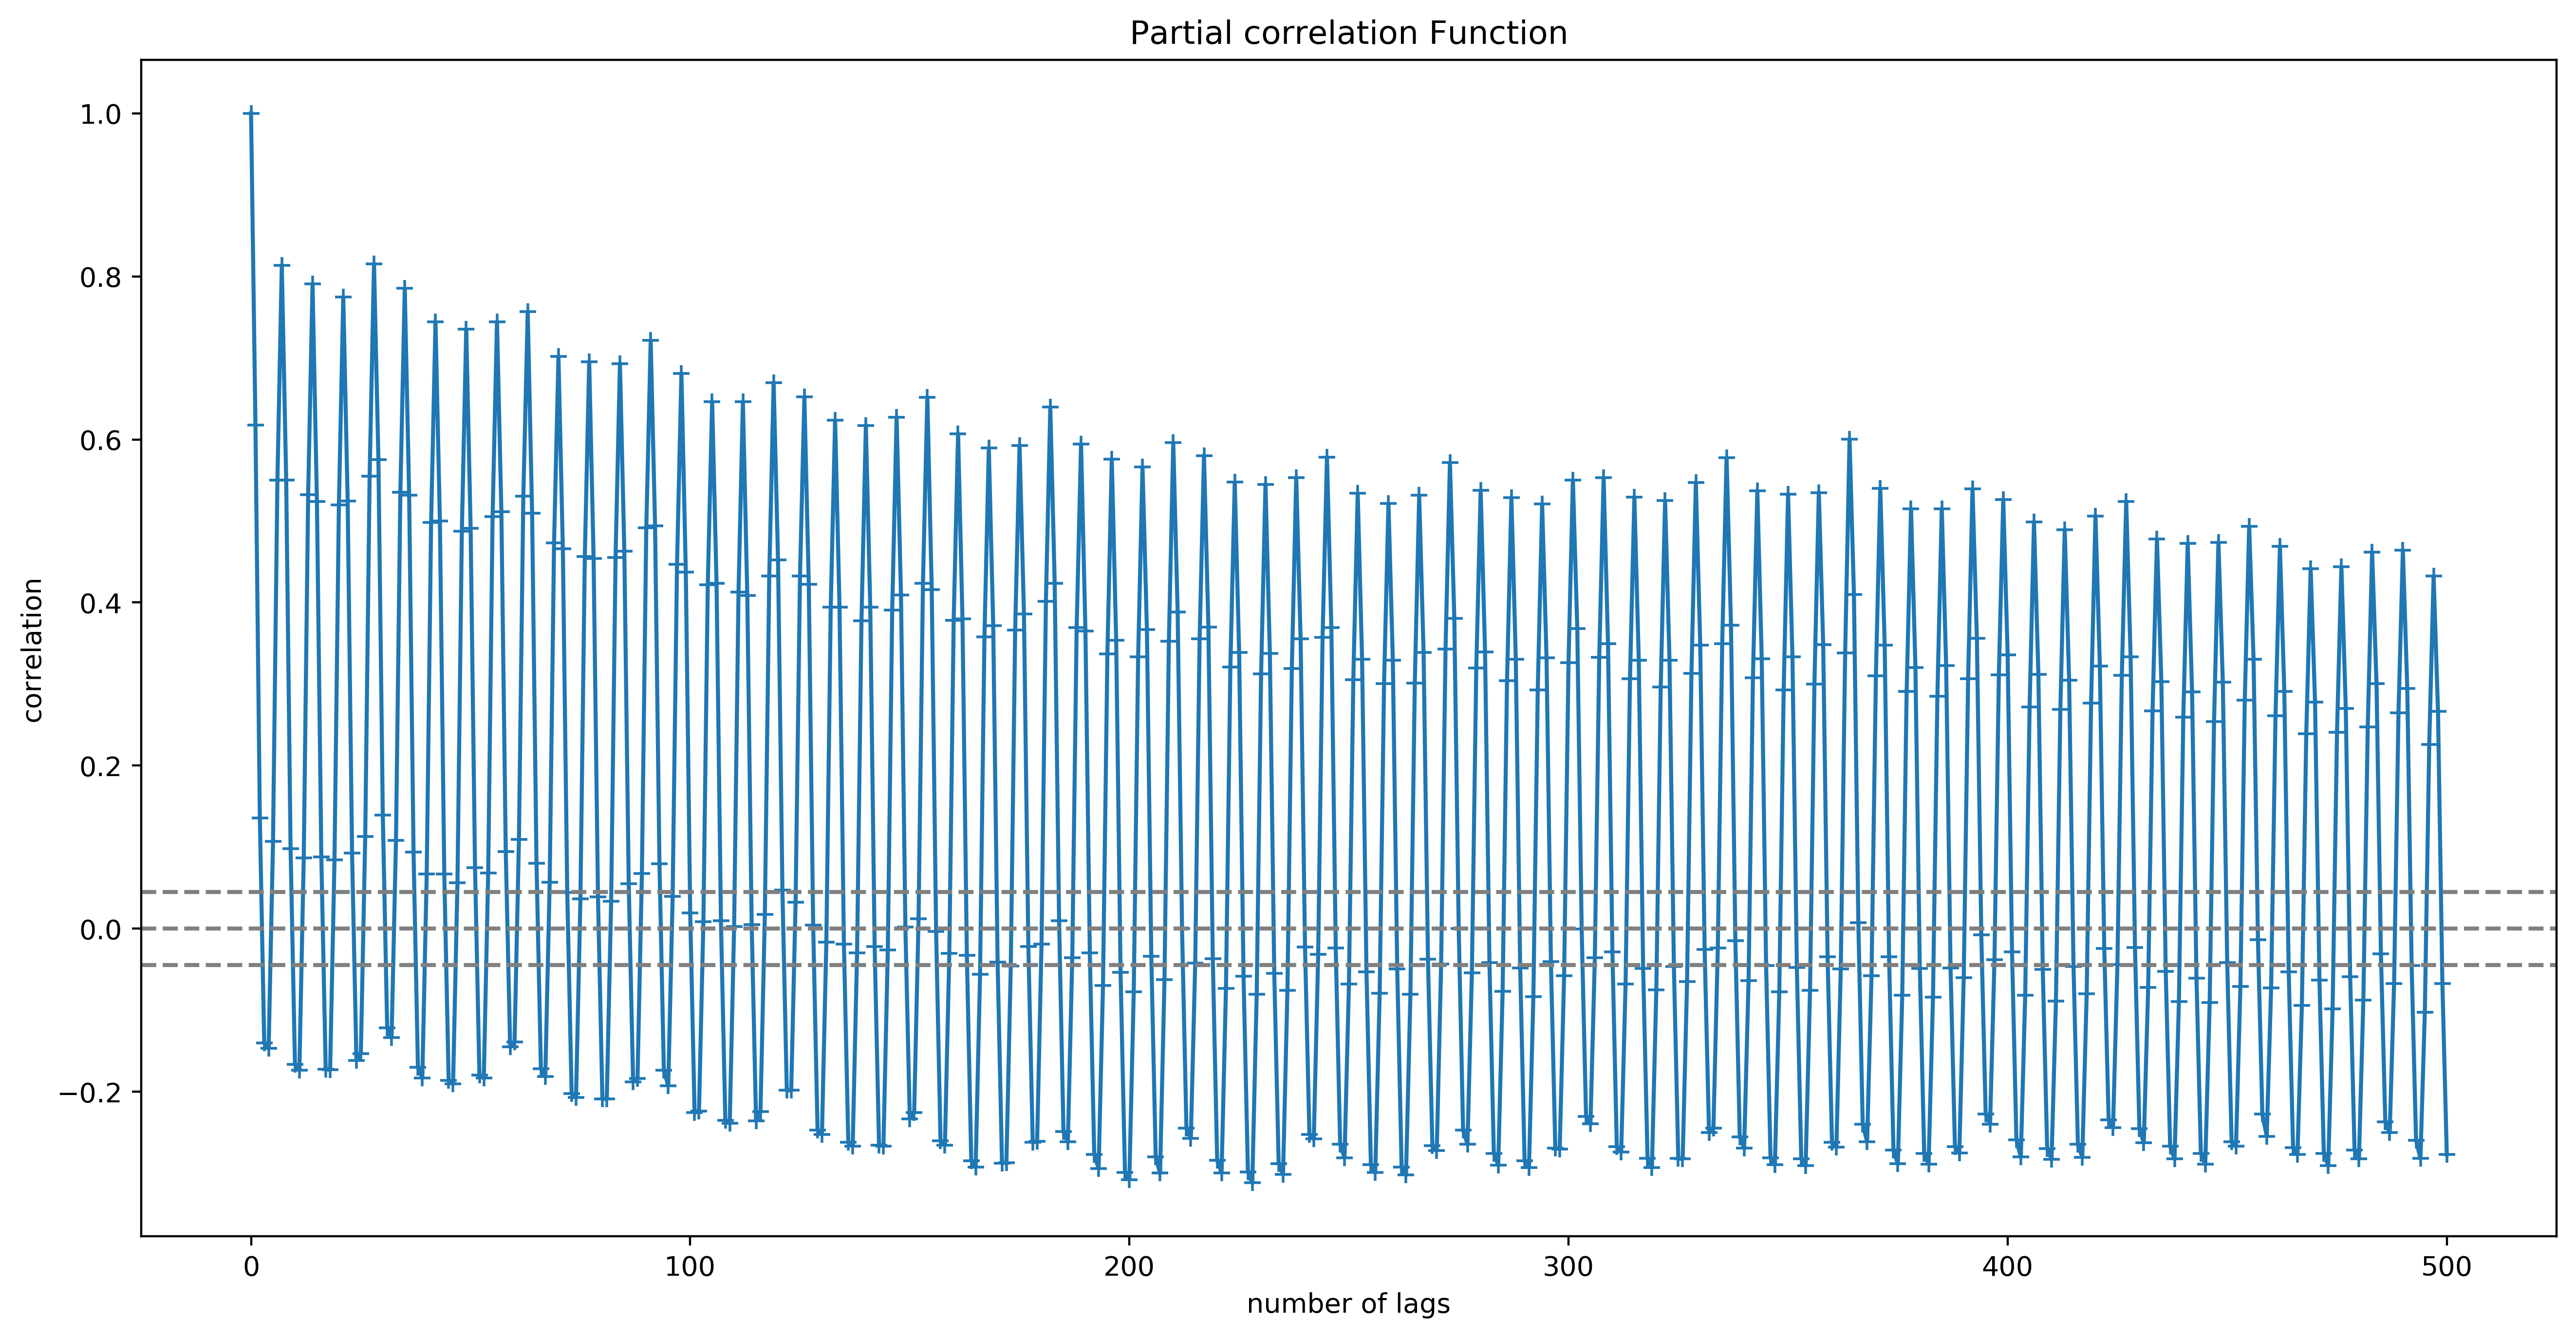

In [20]:
from statsmodels.tsa.stattools import acf, pacf

#calling auto correlation function
lag_acf = acf(store_level_final['CA_1'].values, nlags=500)
fig,axs=plt.subplots(figsize=(16,8),dpi=400)
axs.plot(lag_acf,marker='+')
axs.axhline(y=0,linestyle='--',color='gray')
axs.axhline(y=-1.96/np.sqrt(len(store_level_final['CA_1'].values)),linestyle='--',color='gray')
axs.axhline(y=1.96/np.sqrt(len(store_level_final['CA_1'].values)),linestyle='--',color='gray')
axs.set_title('Partial correlation Function')
axs.set_xlabel('number of lags')
axs.set_ylabel('correlation')

plt.show()

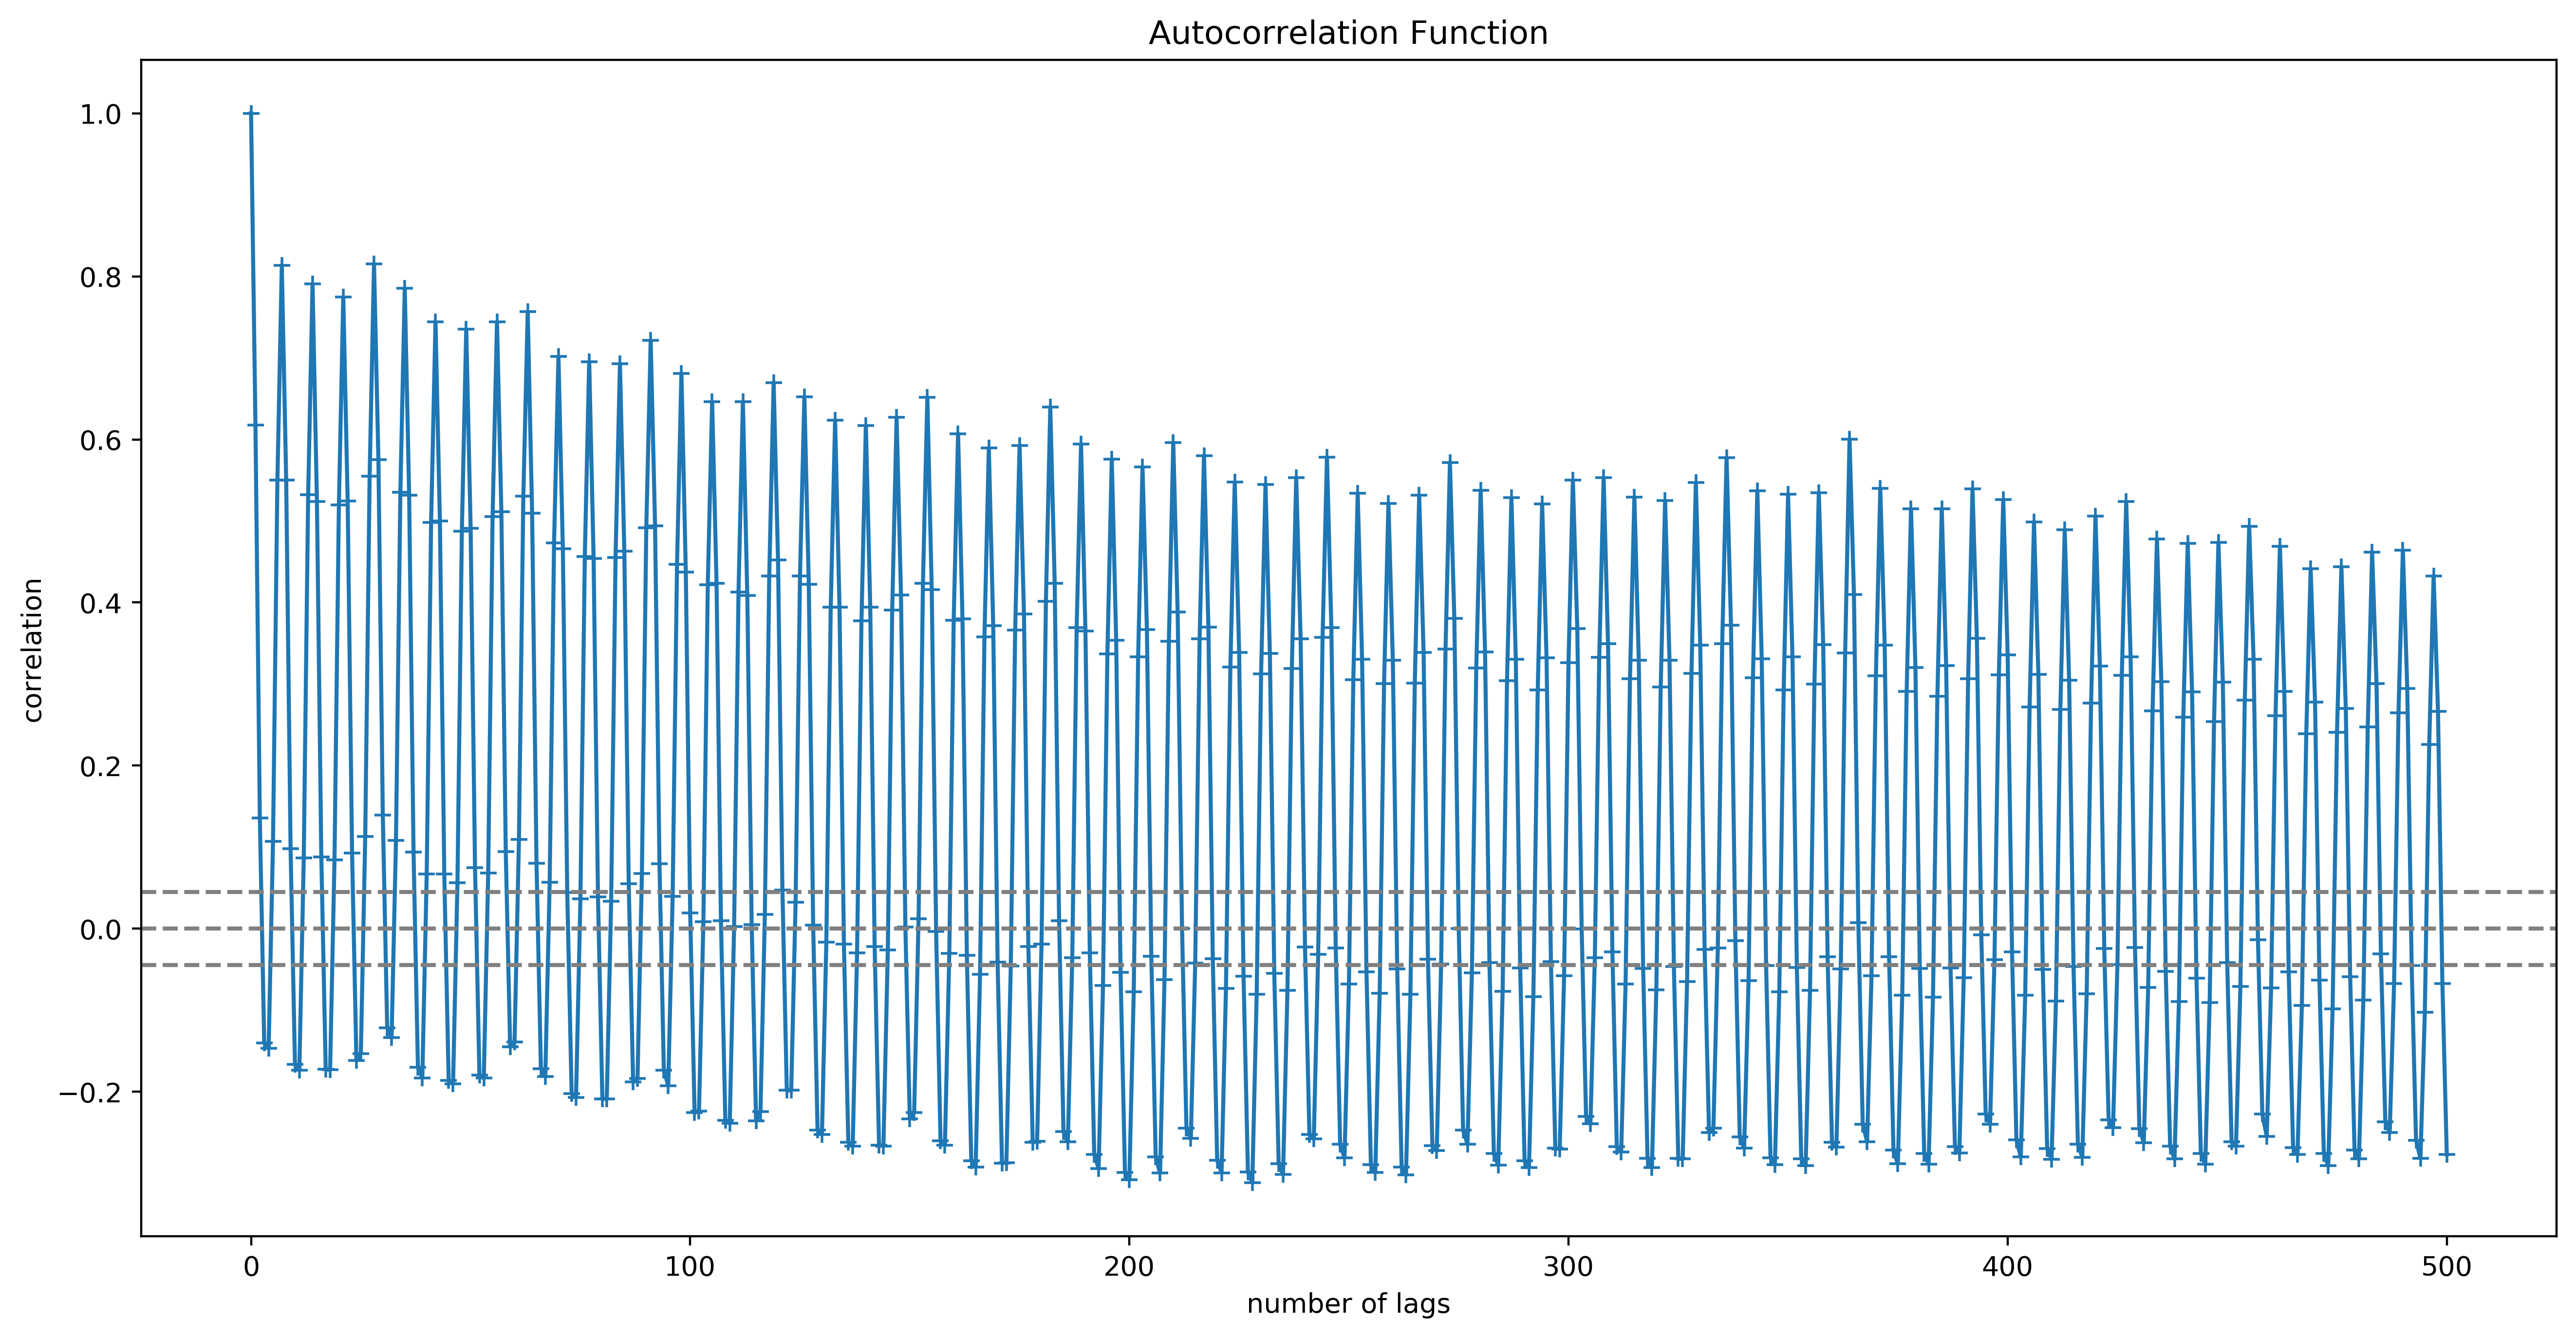

In [21]:

#calling partial correlation function
lag_pacf = pacf(store_level_final['CA_1'].values, nlags=300, method='ols')
fig,axs=plt.subplots(figsize=(16,8),dpi=400)
axs.plot(lag_acf,marker='+')
axs.axhline(y=0,linestyle='--',color='gray')
axs.axhline(y=-1.96/np.sqrt(len(store_level_final['CA_1'].values)),linestyle='--',color='gray')
axs.axhline(y=1.96/np.sqrt(len(store_level_final['CA_1'].values)),linestyle='--',color='gray')
axs.set_title('Autocorrelation Function')
axs.set_xlabel('number of lags')
axs.set_ylabel('correlation')

plt.show()

In [24]:

from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=False):

    n_vars = 1 if type(data) is list else data.shape[1]
    cols=pd.DataFrame()
    names=list()
    for i in range(n_in, 0, -1):
        df=pd.DataFrame()
        names=list()
        df=data.shift(i)
        names += [('%s(t-%d)' % (data.columns[j], i)) for j in range(n_vars)]
        df.columns=names
        cols = pd.concat([cols, df], axis=1, sort=False)
    for i in range(0, n_out):
        df=pd.DataFrame()
        names=list()
        df=data.shift(-i)
        if i == 0:
            names += [('%s(t)' % (data.columns[j])) for j in range(n_vars)]
        else:
            names += [('%s(t+%d)' % (data.columns[j], i)) for j in range(n_vars)]
            
        df.columns=names
        cols=pd.concat([cols,df],axis=1,sort=False)
    if dropnan:
        cols.dropna(inplace=True)
    return cols


series_to_supervised(store_level_final,10,2)

CA_1(t-10)  CA_2(t-10)  CA_3(t-10)  CA_4(t-10)  TX_1(t-10)  \
date                                                                     
2011-01-29         NaN         NaN         NaN         NaN         NaN   
2011-01-30         NaN         NaN         NaN         NaN         NaN   
2011-01-31         NaN         NaN         NaN         NaN         NaN   
2011-02-01         NaN         NaN         NaN         NaN         NaN   
2011-02-02         NaN         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2016-04-20      5969.0      6297.0      8602.0      3195.0      4148.0   
2016-04-21      4484.0      3891.0      6580.0      2535.0      3168.0   
2016-04-22      3579.0      3798.0      5641.0      2174.0      3029.0   
2016-04-23      3478.0      3545.0      5377.0      2214.0      2852.0   
2016-04-24      3637.0      3441.0      5493.0      2498.0      2924.0   

            TX_2(t-10)  TX_3(t-10)  WI_1(t-10)  WI_2(t-10)  WI_3(t-10)  ...  \
date                                                                    ...   
2011-01-29         NaN         NaN         NaN         NaN         NaN  ...   
2011-01-30         NaN         NaN         NaN         NaN         NaN  ...   
2011-01-31         NaN         NaN         NaN         NaN         NaN  ...   
2011-02-01         NaN         NaN         NaN         NaN         NaN  ...   
2011-02-02         NaN         NaN         NaN         NaN         NaN  ...   
...                ...         ...         ...         ...         ...  ...   
2016-04-20      5035.0      4635.0      4995.0      6012.0      4968.0  ...   
2016-04-21      4033.0      3973.0      3493.0      6227.0      4043.0  ...   
2016-04-22      3484.0      3905.0      3388.0      5934.0      4137.0  ...   
2016-04-23      3348.0      3494.0      3169.0      4584.0      3132.0  ...   
2016-04-24      3851.0      3517.0      3241.0      5263.0      3664.0  ...   

           wday(t+1)  month(t+1) year(t+1)  event_name_1(t+1)  \
date                                                            
2011-01-29       2.0         1.0    2011.0                NaN   
2011-01-30       3.0         1.0    2011.0                NaN   
2011-01-31       4.0         2.0    2011.0                NaN   
2011-02-01       5.0         2.0    2011.0                NaN   
2011-02-02       6.0         2.0    2011.0                NaN   
...              ...         ...       ...                ...   
2016-04-20       6.0         4.0    2016.0                NaN   
2016-04-21       7.0         4.0    2016.0                NaN   
2016-04-22       1.0         4.0    2016.0                NaN   
2016-04-23       2.0         4.0    2016.0                NaN   
2016-04-24       NaN         NaN       NaN                NaN   

            event_type_1(t+1)  event_name_2(t+1) event_type_2(t+1)  \
date                                                                 
2011-01-29                NaN                NaN               NaN   
2011-01-30                NaN                NaN               NaN   
2011-01-31                NaN                NaN               NaN   
2011-02-01                NaN                NaN               NaN   
2011-02-02                NaN                NaN               NaN   
...                       ...                ...               ...   
2016-04-20                NaN                NaN               NaN   
2016-04-21                NaN                NaN               NaN   
2016-04-22                NaN                NaN               NaN   
2016-04-23                NaN                NaN               NaN   
2016-04-24                NaN                NaN               NaN   

           snap_CA(t+1) snap_TX(t+1) snap_WI(t+1)  
date                                               
2011-01-29          0.0          0.0          0.0  
2011-01-30          0.0          0.0          0.0  
2011-01-31          1.0          1.0          0.0  
2011

In [7]:

def plot(data):
  plt.plot(list(range(0,data.shape[0])),data)  
  plt.show()

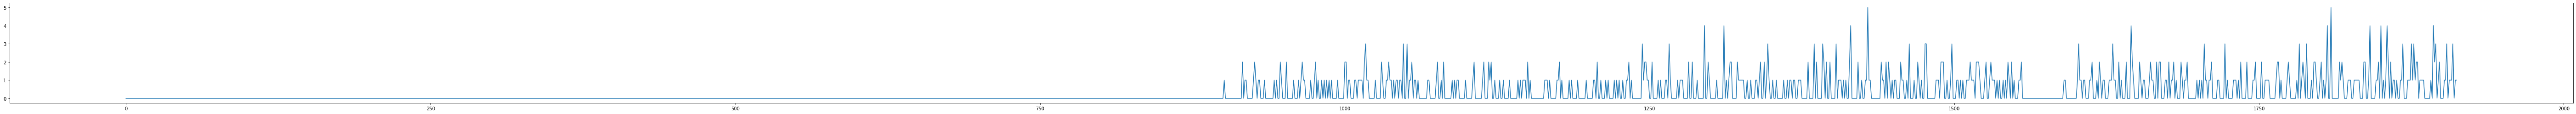

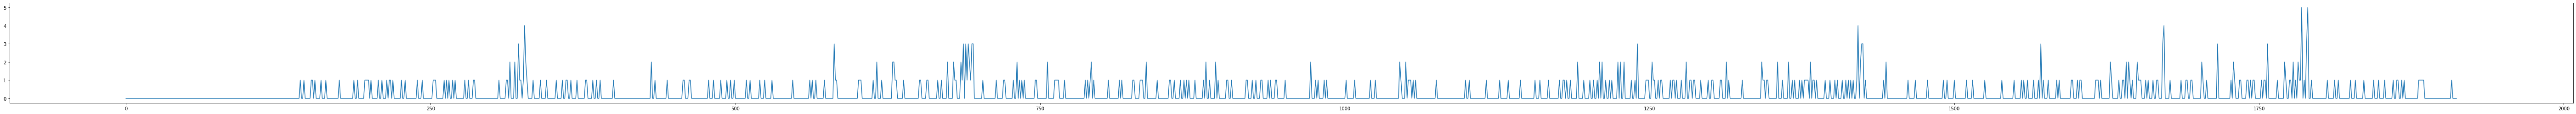

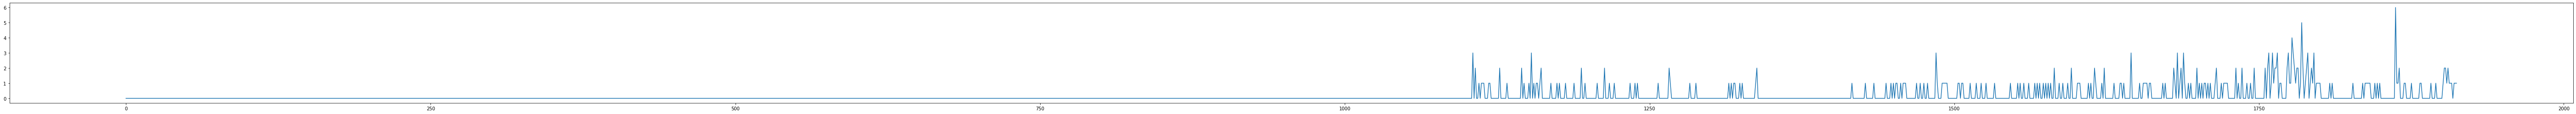

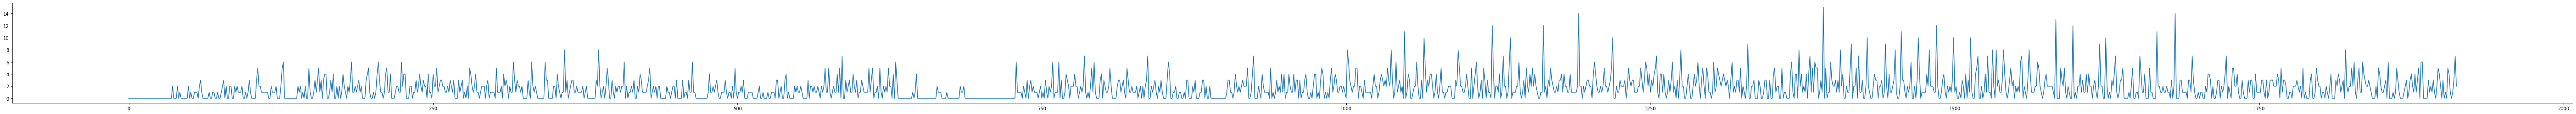

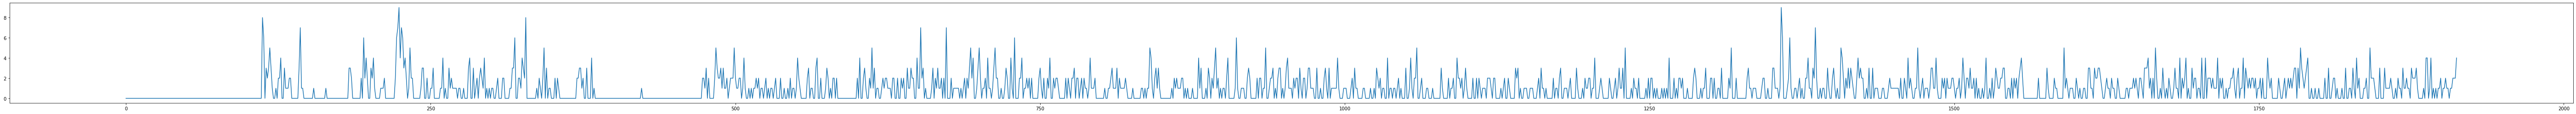

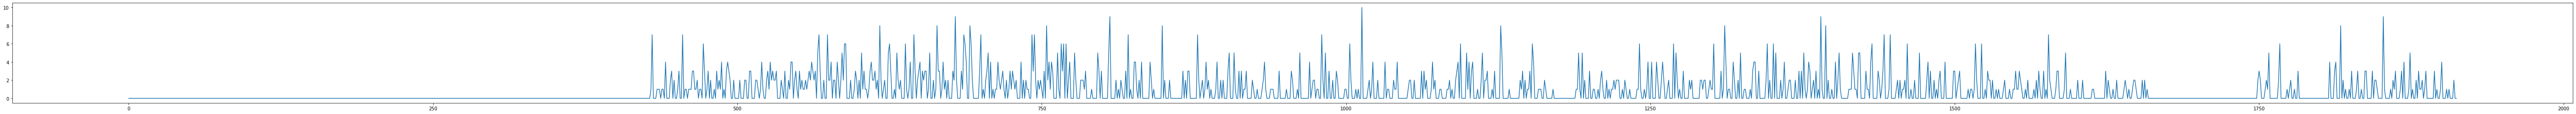

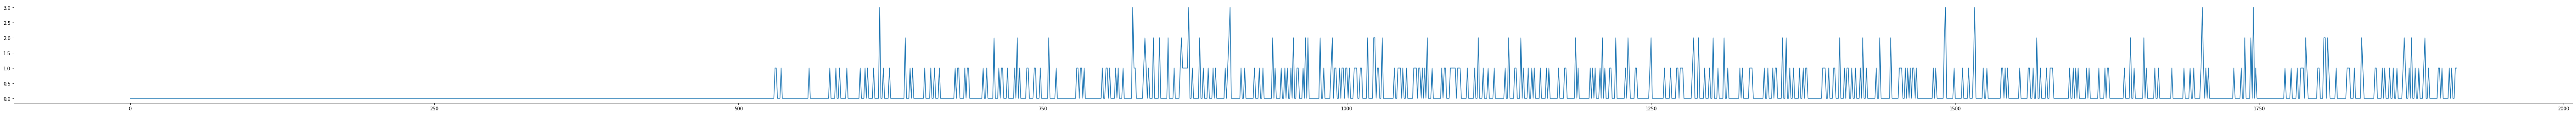

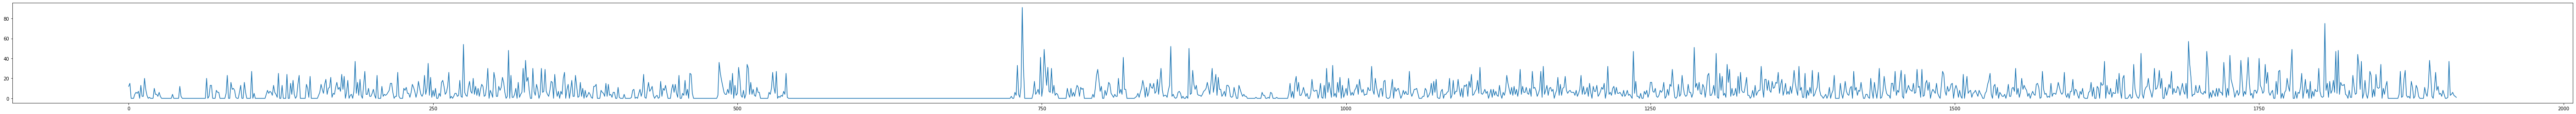

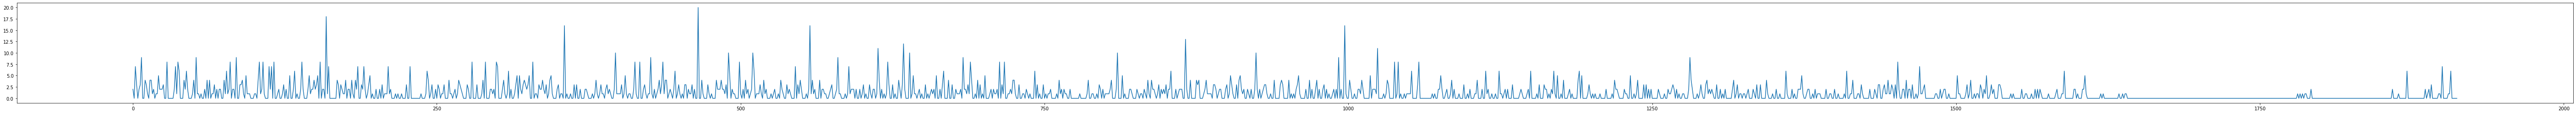

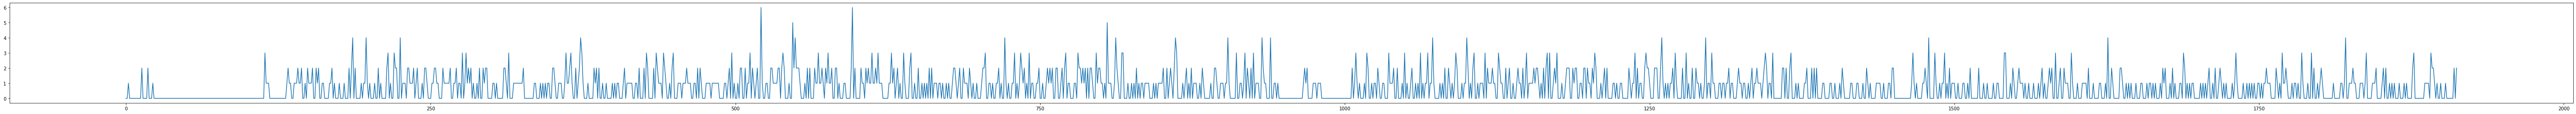

In [0]:
for i in range(10):
  fig = plt.gcf()
  ts = ts1 = data.iloc[i,6:]
  fig.set_size_inches(100, 4)
  plot(ts)
  